In [3]:
import re 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
import fine_tunned_bert

from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf

# model evaluation 
import scikitplot as skplt

In [5]:
df= pd.read_csv('data/moral_appeal_dataset.csv')
df

,ad,moral_appeal
0,psd jobs spring launch webinar monday pmpm vir...,0
1,the aflcio has always fought alongside workers...,1
2,your national monuments are on the chopping block,0
3,join us for a focus group to share your though...,0
4,with president trump nominating a judge with a...,1
...,...,...
19729,what is senator heidi heitkamp hiding watch be...,0
19730,breaking the washington post just reported on ...,0
19731,protecting vermont is injured employees contac...,1
19732,according to the huffington post days after pa...,0


In [11]:
bert_model_name='small_bert/bert_en_uncased_L-4_H-512_A-8'

In [12]:
# vectorize testing and training data 
cleaned_train, cleaned_test, y_train, y_test= train_test_split(df['ad'], df['moral_appeal'] , test_size = 0.2, random_state = 0)
cleaned_train, cleaned_val, y_train, y_val = train_test_split(cleaned_train, y_train,  test_size=0.25, random_state= 42, shuffle = True)

In [13]:
train_data = tf.data.Dataset.from_tensor_slices(  (cleaned_train,y_train) ).batch(32)
val_data = tf.data.Dataset.from_tensor_slices( (cleaned_val,y_val) ).batch(32)
test_data = tf.data.Dataset.from_tensor_slices( (cleaned_test,y_test) ).batch(32)

In [14]:
# create the fine_tunned_model
bert_model = fine_tunned_bert.create_fine_tunned_bert(train_data,bert_model_name=bert_model_name)

# training the model
history = bert_model.fit(x=train_data,epochs =5,validation_data = val_data,verbose=False)

In [15]:
# evaluation 
scores = bert_model.evaluate(test_data)

predictions = bert_model.predict(cleaned_test)
results = (predictions>0.5)*1

124/124 [==============================] - 9s 69ms/step


                 precision    recall  f1-score   support

no moral appeal       1.00      0.99      1.00      1934
   moral appeal       0.99      1.00      1.00      2013

       accuracy                           1.00      3947
      macro avg       1.00      1.00      1.00      3947
   weighted avg       1.00      1.00      1.00      3947

confusion matrix:
[[1922   12]
 [   6 2007]]



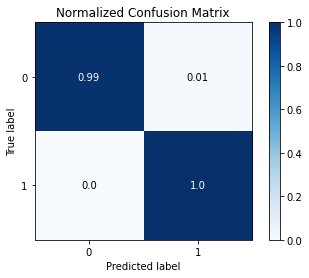

In [16]:
pred = [1 if prob > 0.5 else 0 for prob in predictions]

print(sklearn.metrics.classification_report(y_test, pred, target_names=[ 'no moral appeal', 'moral appeal']))
print("confusion matrix:")
print(sklearn.metrics.confusion_matrix(y_test, pred))
print()

skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)
plt.show()
print()

7/7 [==============================] - 0s 67ms/step - loss: 1.9094 - accuracy: 0.7200 - precision_1: 0.6720 - recall_1: 0.8485 - auc_1: 0.7715
Accuracy: 72.00%
7/7 [==============================] - 0s 65ms/step
                 precision    recall  f1-score   support

no moral appeal       0.80      0.59      0.68       101
   moral appeal       0.67      0.85      0.75        99

       accuracy                           0.72       200
      macro avg       0.74      0.72      0.72       200
   weighted avg       0.74      0.72      0.72       200

confusion matrix:
[[60 41]
 [15 84]]



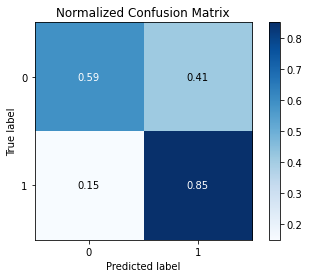

In [18]:
import sklearn 
save = pd.read_csv('data/sample_moral_appeal.csv')

test_data = tf.data.Dataset.from_tensor_slices( (save['ad'],save['moral']) ).batch(32)
# model evaluation 
scores = bert_model.evaluate(test_data)
print("Accuracy: %.2f%%" % (scores[1]*100))

pred_ =  bert_model.predict(save['ad'])
save['predicted'] = [1 if prob > 0.5 else 0 for prob in pred_]
print(sklearn.metrics.classification_report(save['moral'], save['predicted'], target_names=[ 'no moral appeal', 'moral appeal']))
print("confusion matrix:")
print(sklearn.metrics.confusion_matrix(save['moral'], save['predicted']))
print()

skplt.metrics.plot_confusion_matrix(save['moral'], save['predicted'], normalize=True)
plt.show()
print()
